In [3]:
#1. Data Collection & Loading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

try:
    df = pd.read_csv('Train.csv')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("ERROR: File not found. Please check the file path and name.")
    df = None 

if df is not None:
    print("\nInitial Data Structure:")
    print(df.head())
    print("\nData Shape (Rows, Columns):", df.shape)
    print("\nData Types:")
    print(df.info())

Data loaded successfully!

Initial Data Structure:
   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  Cost_of_the_Product  Prior_purchases Product_importance Gender  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N
0   1               D           Flight                    4                2                  177                3                low      F                44           1233                    1
1   2               F           Flight                    4                5                  216                2                low      M                59           3088                    1
2   3               A           Flight                    2                2                  183                4                low      M                48           3374                    1
3   4               B           Flight                    3                3                  176                4             medium      M                10           

In [ ]:
# 2. Fix Incorrect Data Types

print("\n--- 2c. Fixing Data Types ---")
print("Initial Data Types:")
print(df.dtypes)


if 'ID' in df.columns and df['ID'].dtype in ['int64', 'float64']:
    df['ID'] = df['ID'].astype(str)
    print("ACTION: Converted 'ID' to string (object) type.")


numeric_cols_to_check = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

for col in numeric_cols_to_check:
    if col in df.columns:
        # Convert to Int64 (capital 'I') for Pandas integer type
        df[col] = df[col].astype('Int64')
        print(f"ACTION: Confirmed/Converted '{col}' to Int64.")

# The target variable 'Reached.on.Time_Y.N' (0 or 1) should be integer.
if 'Reached.on.Time_Y.N' in df.columns:
    df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('Int64')
    print("ACTION: Confirmed/Converted 'Reached.on.Time_Y.N' to Int64.")


print("\nData Types After Fixing:")
print(df.info())

In [ ]:
# 3. Descriptive Statistics

print("\n--- 3a. Numerical Descriptive Statistics ---")
# Generates count, mean, std, min, max, and quartiles for numeric columns
print(df.describe().T)

print("\n" + "="*50)
print("--- 3b. Distribution of Categorical Features (Top 5) ---")
print("="*50)

# List of all categorical/object columns
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for col in categorical_cols:
    if col in df.columns:
        print(f"\nDistribution for: {col}")
        
        value_counts = df[col].value_counts()
        percentage = df[col].value_counts(normalize=True) * 100
        
      
        distribution_table = pd.DataFrame({'Count': value_counts, 'Percentage (%)': percentage.round(2)})
        print(distribution_table.head(5))
        print("-" * 40)

In [ ]:
# 2. Data Cleaning

# a. Handling Missing Values (NaN)
print("\n--- 2a. Missing Values Report ---")
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_table = pd.DataFrame({'Missing Count': missing_data, 'Percentage (%)': missing_percentage})
missing_table = missing_table[missing_table['Missing Count'] != 0].sort_values(by='Missing Count', ascending=False)
print(missing_table)


for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        # Fill numeric NaNs with the median
        df[col].fillna(df[col].median(), inplace=True)
    elif df[col].dtype == 'object':
        # Fill categorical/object NaNs with 'Unknown'
        df[col].fillna('Unknown', inplace=True)
    # Re-check to confirm missing values are handled
    # print(f"Missing values in {col} after cleaning: {df[col].isnull().sum()}")


# b. Remove Duplicates
print("\n--- 2b. Duplicates Report ---")
initial_rows = len(df)
df.drop_duplicates(inplace=True)
duplicates_removed = initial_rows - len(df)
print(f"Total Duplicate Rows Found and Removed: {duplicates_removed}")
print(f"Current Data Shape after removing duplicates: {df.shape}")

In [ ]:
# 2c. Fix Incorrect Data Types

print("\n--- 2c. Fixing Data Types ---")
# Display initial data types for comparison
print("Initial Data Types:")
print(df.dtypes)

if 'ID' in df.columns and df['ID'].dtype in ['int64', 'float64']:
    df['ID'] = df['ID'].astype(str)
    print("ACTION: Converted 'ID' to string (object) type.")


numeric_cols_to_check = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

for col in numeric_cols_to_check:
    if col in df.columns:
        # Step 1: Convert to numeric, coercing errors (turning unfixable values into NaN)
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Step 2: Convert to integer type, if possible.
        # Use Int64 (capital 'I') for Pandas integer to handle potential NaN values correctly.
        try:
            df[col] = df[col].astype('Int64')
            print(f"ACTION: Converted '{col}' to Int64 (integer with NaN support).")
        except:
            # If Int64 conversion fails (e.g., still contains non-integer data), keep as float
            print(f"NOTE: '{col}' retained as float/numeric type.")
    else:
        print(f"WARNING: Column '{col}' not found.")

# The target variable 'Reached.on.Time_Y.N' is a binary flag (0 or 1), which should be integer.
if 'Reached.on.Time_Y.N' in df.columns:
    df['Reached.on.Time_Y.N'] = pd.to_numeric(df['Reached.on.Time_Y.N'], errors='coerce').astype('Int64')
    print("ACTION: Converted 'Reached.on.Time_Y.N' to Int64.")


print("\nData Types After Fixing:")
# Display final data types
print(df.info())

In [ ]:
# 3. Descriptive Statistics

print("\n--- 3a. Numerical Descriptive Statistics ---")
# Generates count, mean, std, min, max, and quartiles for numeric columns
print(df.describe().T)

print("\n--- Mode and Variance ---")
numeric_df = df.select_dtypes(include=np.number)

# Mode
print("\nMode (Most Frequent Value) for Numeric Features:")
print(numeric_df.mode().iloc[0])

# Variance
print("\nVariance for Numeric Features:")
print(numeric_df.var())

In [ ]:
# b. Distribution of Features (Categorical)

print("\n--- 3b. Distribution of Categorical Features ---")
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nValue Counts for: {col}")
    
    print(df[col].value_counts(normalize=True).head(10) * 100)
    print("-" * 30)

In [ ]:
# 4. Data Visualization

sns.set_style("whitegrid")
plt.figure(figsize=(15, 12))

# a. Histograms (Distribution of Numerical Features)
print("\n--- 4a. Histograms (Distribution) ---")
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Numerical Features', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


# b. Boxplots (Outliers)
print("\n--- 4b. Boxplots (Outliers Detection) ---")
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, int(np.ceil(len(numeric_cols)/2)), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


# c. Scatter plots (Relationships) - Example: Cost vs. Weight
print("\n--- 4c. Scatter Plots (Relationships) ---")

if 'Cost of the product' in df.columns and 'Weight(gms)' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Weight(gms)', y='Cost of the product', data=df)
    plt.title('Cost of Product vs. Weight')
    plt.xlabel('Weight (gms)')
    plt.ylabel('Cost of the product')
    plt.show()

# d. Correlation Heatmaps
print("\n--- 4d. Correlation Heatmap ---")
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
# 4. Data Visualization

sns.set_style("whitegrid")

# Define numerical columns again for visualization
# Exclude the ID column and the binary target variable for distribution plots
numerical_for_plot = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 
                      'Prior_purchases', 'Discount_offered', 'Weight_in_gms']


# 4a. Histograms (Distribution of Numerical Features)

print("\n--- 4a. Histograms (Distribution) ---")
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_for_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle('Histograms of Numerical Features', y=1.02, fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


# 4b. Boxplots (Outliers)

print("\n--- 4b. Boxplots (Outliers Detection) ---")
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_for_plot):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.ylabel(col)

plt.suptitle('Boxplots for Outlier Detection', y=1.02, fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


# 4c. Scatter plots (Relationships) - Example: Cost vs. Weight

print("\n--- 4c. Scatter Plots (Relationships) ---")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight_in_gms', y='Cost_of_the_Product', data=df, hue='Reached.on.Time_Y.N', palette='viridis')
plt.title('Cost vs. Weight (Colored by On-Time Delivery)')
plt.xlabel('Weight (gms)')
plt.ylabel('Cost of the Product')
plt.legend(title='On-Time (1=Yes)')
plt.show()


# 4d. Correlation Heatmaps

print("\n--- 4d. Correlation Heatmap ---")
plt.figure(figsize=(10, 8))
# Include the binary target variable 'Reached.on.Time_Y.N' in the correlation matrix
all_numerical_cols = numerical_for_plot + ['Reached.on.Time_Y.N']
correlation_matrix = df[all_numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

In [ ]:
# 6. Anomaly and outlier detection

print("\n--- 6a. Detecting Outliers using IQR ---")

outlier_results = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

 
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outlier_results[col] = {
        'Outlier Count': len(outliers),
        'Percentage': (len(outliers) / len(df)) * 100
    }
    
   
    if len(outliers) > 0:
        print(f"\nFeature: {col}")
        print(f"  Outlier Count: {len(outliers)} ({outlier_results[col]['Percentage']:.2f}%)")
        print("  Sample Outliers:")
        print(outliers.head(5)[[col]])

# Summarize all outlier counts
outlier_summary = pd.DataFrame(outlier_results).T
print("\n--- Comprehensive Outlier Summary ---")
print(outlier_summary)

In [ ]:
# 5a. Final Correlation Analysis with Target Variable (from Step 4d data)

print("\n--- 5a. Correlation with Target Variable (Reached.on.Time_Y.N) ---")

try:
    all_numerical_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 
                          'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
    correlation_matrix = df[all_numerical_cols].corr()
    
    target_corr = correlation_matrix['Reached.on.Time_Y.N'].sort_values(ascending=False)
    print(target_corr)
except NameError:
    print("ERROR: Correlation matrix not found. Please re-run Step 4d.")

# 5b. Group by analysis: On-Time Delivery Status by Key Categorical Features

print("\n" + "="*50)
print("--- 5b. Group By Analysis: On-Time Performance (1) by Category ---")
print("="*50)

categorical_cols_for_group = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for col in categorical_cols_for_group:
    # Calculate the mean of 'Reached.on.Time_Y.N' (which is the percentage of On-Time=1)
    # The mean of a binary column (0/1) gives the proportion of '1's
    performance = df.groupby(col)['Reached.on.Time_Y.N'].mean().sort_values(ascending=False)
    
    print(f"\nAverage On-Time Rate (Performance) by {col}:")
    print(performance.apply(lambda x: f"{x*100:.2f}%")) # Display as a percentage
    print("-" * 40)
    
    # Optional: Visualization of Group-by 
    plt.figure(figsize=(7, 5))
    performance.plot(kind='bar', color='darkblue')
    plt.title(f'On-Time Rate by {col}')
    plt.ylabel('On-Time Percentage (Mean of Reached.on.Time_Y.N)')
    plt.xticks(rotation=0 if col == 'Gender' else 45)
    plt.show()

In [ ]:
# 5b. Group By Analysis: Delayed Performance (1 - On-Time Rate) by Category

print("\n" + "="*50)
print("--- Delayed Performance Rate (1 - On-Time Rate) by Category ---")
print("="*50)

categorical_cols_for_group = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for col in categorical_cols_for_group:
    # 1. Calculate the On-Time Rate (Mean of the binary column)
    on_time_rate = df.groupby(col)['Reached.on.Time_Y.N'].mean()
    
    # 2. Calculate the Delayed Rate (1 - On-Time Rate)
    delayed_rate = 1 - on_time_rate
    
    # Sort by the highest delayed rate
    performance = delayed_rate.sort_values(ascending=False)
    
    print(f"\nAverage Delayed Rate by {col}:")
    print(performance.apply(lambda x: f"{x*100:.2f}%")) # Display as a percentage
    print("-" * 40)
    
    # Visualization of Group-by
    plt.figure(figsize=(7, 5))
    performance.plot(kind='bar', color='darkred') # Use a different color to denote delays
    plt.title(f'Delayed Rate by {col}')
    plt.ylabel('Delayed Percentage (1 - Mean of Reached.on.Time_Y.N)')
    plt.xticks(rotation=0 if col == 'Gender' else 45)
    plt.show()


--- Class Imbalance Analysis ---
             Count  Percentage
Delayed (0)   6549       59.54
On-Time (1)   4450       40.46


C:\Users\Dell\AppData\Local\Temp\ipykernel_22704\2648147304.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=imbalance_df.index, y='Count', data=imbalance_df, palette=['darkred', 'darkgreen'])


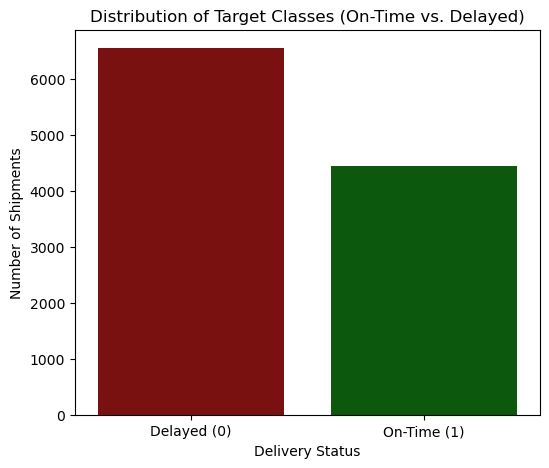

In [4]:
# Analyze Class Imbalance

print("\n--- Class Imbalance Analysis ---")

# Calculate value counts
class_counts = df['Reached.on.Time_Y.N'].value_counts()

# Calculate percentages
class_percentages = df['Reached.on.Time_Y.N'].value_counts(normalize=True) * 100

# Create a summary DataFrame
imbalance_df = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percentages.round(2)
})
imbalance_df.index = ['Delayed (0)', 'On-Time (1)']

print(imbalance_df)

# Visualize Imbalance
plt.figure(figsize=(6, 5))
sns.barplot(x=imbalance_df.index, y='Count', data=imbalance_df, palette=['darkred', 'darkgreen'])
plt.title('Distribution of Target Classes (On-Time vs. Delayed)')
plt.ylabel('Number of Shipments')
plt.xlabel('Delivery Status')
plt.show()